<a href="https://colab.research.google.com/github/SurajLahariya/DS_learning/blob/main/PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
url = 'https://raw.githubusercontent.com/SurajLahariya/DS_learning/main/wine.csv'

In [9]:
wine = pd.read_csv(url)

In [10]:
wine.data = wine.iloc[:,1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [11]:
wine.data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
wine2 = wine.data.values
wine2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
wine2.shape

(178, 13)

In [14]:
def normalise(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [15]:
wine3 = normalise(wine2)

In [16]:
wine3

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [17]:
wine3.shape

(178, 13)

In [18]:
pca = PCA()
pca_values = pca.fit_transform(wine3)

In [19]:
pca = PCA(n_components=6)
pca_values = pca.fit_transform(wine3)

In [20]:
var = pca.explained_variance_ratio_

In [21]:
var1 = np.cumsum(np.round(var,decimals=4)*100)

In [22]:
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  ])

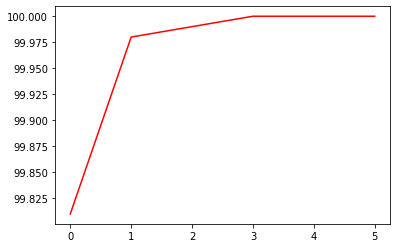

In [23]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [24]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

In [25]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]

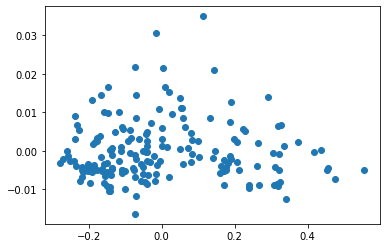

In [26]:
plt.scatter(x,y)

In [27]:
PCA_df = pd.DataFrame(data = pca_values[:,0:2],columns = ['PC1','PC2'])
PCA_df.head(2)

,PC1,PC2
0,0.189635,0.012794
1,0.180429,-0.003194


In [28]:
# AgglomerativeClustering clusterig

In [29]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

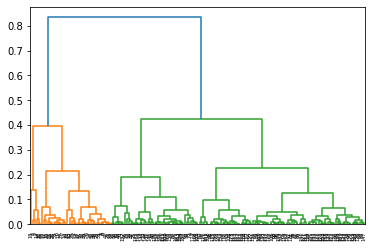

In [30]:
dendrogram = sch.dendrogram(sch.complete(PCA_df))

In [31]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [32]:
y_hc = hc.fit_predict(PCA_df)
clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [33]:
FinalDF = pd.concat([PCA_df, wine.iloc[:,0],clusters], axis=1)

In [34]:
FinalDF

,PC1,PC2,Type,Clusters
0,0.189635,0.012794,1,0
1,0.180429,-0.003194,1,0
2,0.260771,-0.003892,1,0
3,0.436486,0.000115,1,0
4,-0.006888,0.011007,1,2
...,...,...,...,...
173,-0.004155,-0.002703,3,2
174,0.001864,0.001390,3,2
175,0.052658,0.011177,3,2
176,0.055633,0.011114,3,2


In [35]:
from sklearn.cluster import KMeans

In [36]:
km = KMeans(n_clusters=3)

In [37]:
model = km.fit(PCA_df)

In [39]:
model.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [40]:
FinalDF['KM_Clusters'] = model.labels_

In [43]:
FinalDF

,PC1,PC2,Type,Clusters,KM_Clusters
0,0.189635,0.012794,1,0,1
1,0.180429,-0.003194,1,0,1
2,0.260771,-0.003892,1,0,1
3,0.436486,0.000115,1,0,1
4,-0.006888,0.011007,1,2,2
...,...,...,...,...,...
173,-0.004155,-0.002703,3,2,2
174,0.001864,0.001390,3,2,2
175,0.052658,0.011177,3,2,2
176,0.055633,0.011114,3,2,2
